In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
if 'notebooks' in os.getcwd():
    os.chdir('..')

print(f'cwd: {os.getcwd()}')

cwd: /Users/gbemidebe/Documents/GitHub/RLseparation


In [3]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from OptiDial import NumericalModel
from OptiDial import simulate, MW_Cl, sensitivity_analysis
from OptiDial import visualize_sensitivity_data
from OptiDial import box_plot

In [4]:
mpl.rcParams['lines.linewidth'] = 1.25 # sets linedwidth
mpl.rcParams['lines.markersize'] = 4 # sets marker-size on lines
mpl.rcParams['figure.dpi'] = 150 # sets dpi

plt.rcParams.update({
     "text.usetex": 1,
     "font.family": "serif",
     "font.sans-serif": ["Times"],
     "font.size": 15})

# Test physics model

In [5]:
# import yaml
# # activate the electrochemical model
# model = NumericalModel(print_info=False)
# # load the parameters and add
# params = yaml.safe_load(open('scripts/params.yaml'))
# # change
# [N, Estack, T_tot, VT_dil, VT_conc] = [15.0, 0.10449886, 88.437294, 1.9980594, 0.0229695]
# #[65.0, 1.7791938, 102.17327, 1.9324489, 0.48559985]
# params['N'] = N
# params['Estack'] = Estack
# params['T_tot'] = T_tot
# params['VT_dil'] = VT_dil
# params['VT_conc'] = VT_conc
# model.set_params(params=params)
# # compute the solution
# try:
#     result = simulate(model=model, dt=20)
# except RuntimeWarning:
#     print('RuntimeWarning')
# # compute the solution with enhanced error handling


# print(f"SR: {result['SR']}")
# print(f"EC: {result['EC']} Wh/m^3")
# print(f"final Cdil: {result['Cdil_f']} mol/m^3")
# print(f"final Cconc: {result['Cconc_f']} mol/m^3")


# # # plot the results
# # plt.scatter(result['times'], result['Cconc'], label='Cconc')
# # plt.scatter(result['times'], result['Cdil'], label='Cdil')

# Assess RL results

## Reward 1

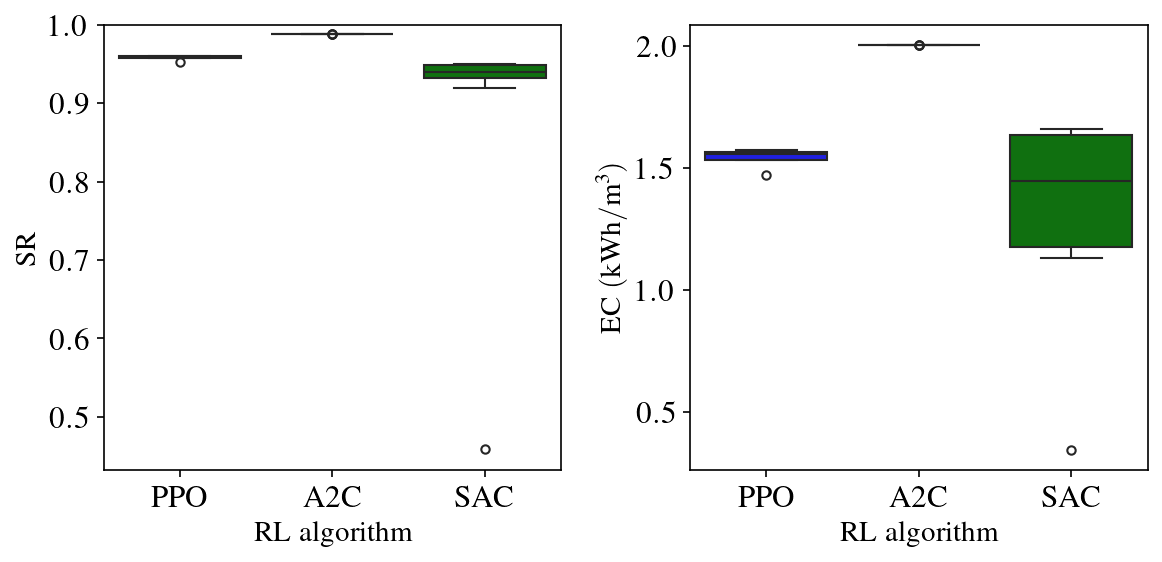

In [6]:
# load the results
df_ppo_one = pd.read_csv('models/reward-one/test_ppo_reward_1.csv')
df_a2c_one = pd.read_csv('models/reward-one/test_a2c_reward_1.csv')
df_sac_one = pd.read_csv('models/reward-one/test_sac_reward_1.csv')

box_plot(ppo=df_ppo_one, 
         a2c=df_a2c_one, 
         sac=df_sac_one, 
         reward_id=1, 
         write_path='images/rl/reward-one')

## Reward 2

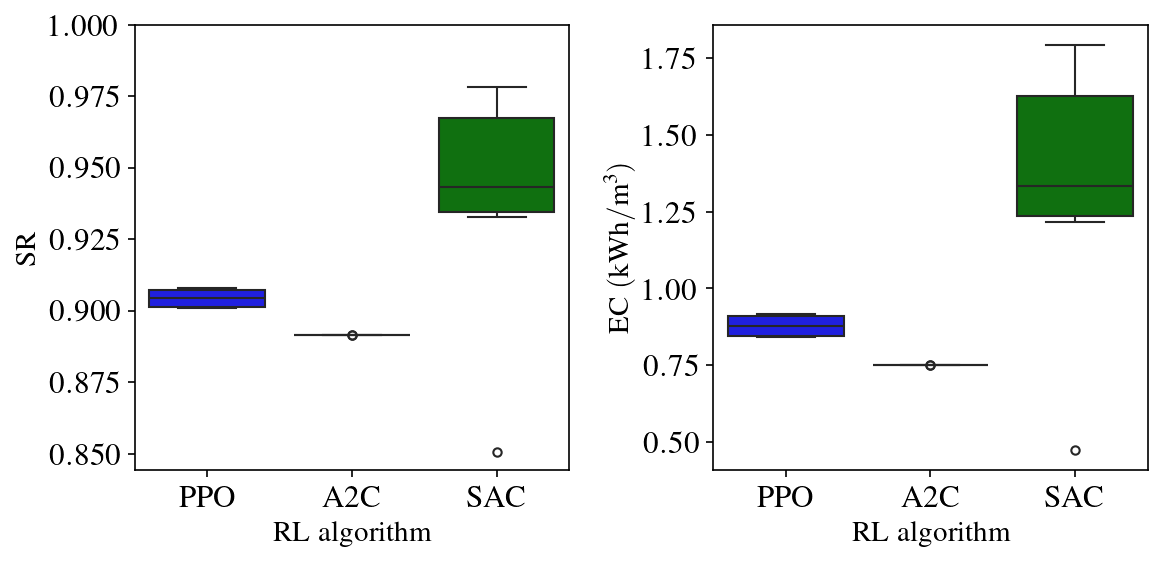

In [7]:
df_ppo_two = pd.read_csv('models/reward-two/test_ppo_reward_2.csv')
df_a2c_two = pd.read_csv('models/reward-two/test_a2c_reward_2.csv')
df_sac_two = pd.read_csv('models/reward-two/test_sac_reward_2.csv')

box_plot(ppo=df_ppo_two, 
         a2c=df_a2c_two, 
         sac=df_sac_two, 
         reward_id=2, 
         write_path='images/rl/reward-two')


## Reward 3

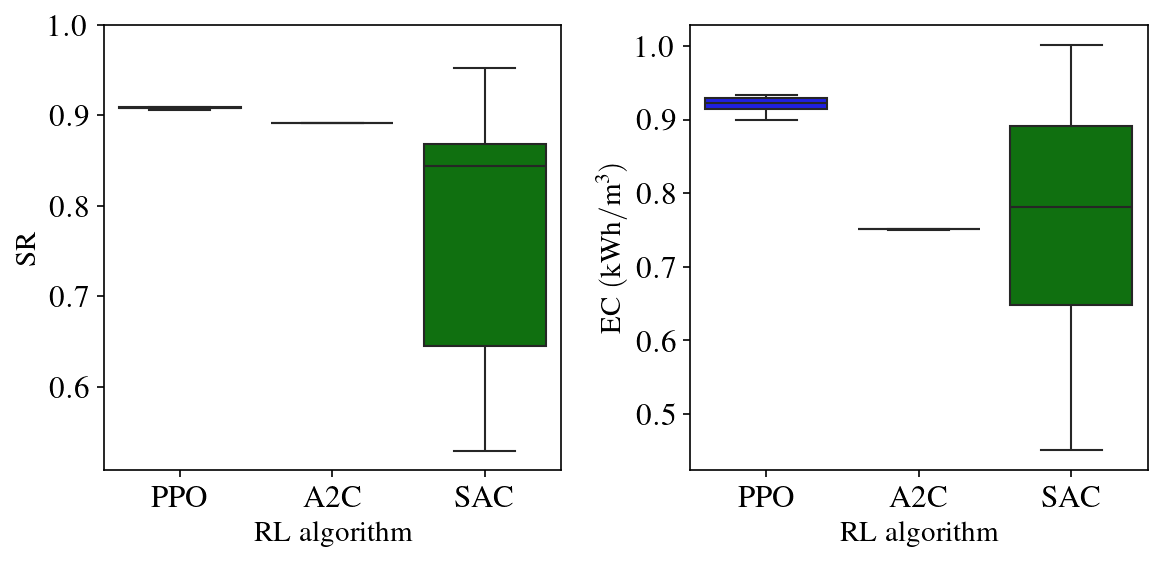

In [8]:
df_ppo_three = pd.read_csv('models/reward-three/test_ppo_reward_3.csv')
df_a2c_three = pd.read_csv('models/reward-three/test_a2c_reward_3.csv')
df_sac_three = pd.read_csv('models/reward-three/test_sac_reward_3.csv')

box_plot(ppo=df_ppo_three, 
         a2c=df_a2c_three, 
         sac=df_sac_three,
         reward_id=3,
         write_path='images/rl/reward-three')


## Statistics

In [21]:
print('******** Reward 1 ********')
print(f'PPO\n  SR: {df_ppo_one["SR"].mean():.3f} +/- {df_ppo_one["SR"].std():.3f} EC: {df_ppo_one["EC"].mean():.3f} +/- {df_ppo_one["EC"].std():.3f}')
print(f'A2C\n  SR: {df_a2c_one["SR"].mean():.3f} +/- {df_a2c_one["SR"].std():.3f} EC: {df_a2c_one["EC"].mean():.3f} +/- {df_a2c_one["EC"].std():.3f}')
print(f'SAC\n  SR: {df_sac_one["SR"].mean():.3f} +/- {df_sac_one["SR"].std():.3f} EC: {df_sac_one["EC"].mean():.3f} +/- {df_sac_one["EC"].std():.3f}')

******** Reward 1 ********
PPO
  SR: 0.959 +/- 0.002 EC: 1.545 +/- 0.030
A2C
  SR: 0.988 +/- 0.000 EC: 2.002 +/- 0.000
SAC
  SR: 0.892 +/- 0.153 EC: 1.329 +/- 0.410


In [22]:

print('******** Reward 2 ********')
print(f'PPO\n  SR: {df_ppo_two["SR"].mean():.3f} +/- {df_ppo_two["SR"].std():.3f} EC: {df_ppo_two["EC"].mean():.3f} +/- {df_ppo_two["EC"].std():.3f}')
print(f'A2C\n  SR: {df_a2c_two["SR"].mean():.3f} +/- {df_a2c_two["SR"].std():.3f} EC: {df_a2c_two["EC"].mean():.3f} +/- {df_a2c_two["EC"].std():.3f}')
print(f'SAC\n  SR: {df_sac_two["SR"].mean():.3f} +/- {df_sac_two["SR"].std():.3f} EC: {df_sac_two["EC"].mean():.3f} +/- {df_sac_two["EC"].std():.3f}')

******** Reward 2 ********
PPO
  SR: 0.904 +/- 0.003 EC: 0.877 +/- 0.033
A2C
  SR: 0.892 +/- 0.000 EC: 0.751 +/- 0.000
SAC
  SR: 0.942 +/- 0.037 EC: 1.353 +/- 0.380


In [23]:
print('******** Reward 3 ********')
print(f'PPO\n  SR: {df_ppo_three["SR"].mean():.3f} +/- {df_ppo_three["SR"].std():.3f} EC: {df_ppo_three["EC"].mean():.3f} +/- {df_ppo_three["EC"].std():.3f}')
print(f'A2C\n  SR: {df_a2c_three["SR"].mean():.3f} +/- {df_a2c_three["SR"].std():.3f} EC: {df_a2c_three["EC"].mean():.3f} +/- {df_a2c_three["EC"].std():.3f}')
print(f'SAC\n  SR: {df_sac_three["SR"].mean():.3f} +/- {df_sac_three["SR"].std():.3f} EC: {df_sac_three["EC"].mean():.3f} +/- {df_sac_three["EC"].std():.3f}')

******** Reward 3 ********
PPO
  SR: 0.908 +/- 0.001 EC: 0.921 +/- 0.011
A2C
  SR: 0.892 +/- 0.000 EC: 0.751 +/- 0.000
SAC
  SR: 0.771 +/- 0.143 EC: 0.772 +/- 0.177
